<a href="https://colab.research.google.com/github/guillaumebrethes/Oct_cda_bankmarketing/blob/main/Sprint_1_1_Encodage_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Sprint 1-1 Encodage des valeurs

In [58]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


###### **1.**   Importation des modules / Importing modules


In [59]:
import numpy as np
%matplotlib inline
import pandas as pd
import seaborn as sns
import calendar
import matplotlib.pyplot as plt

import plotly.express as px
from plotly import graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import scipy.stats as stats
from scipy.stats import chi2_contingency


###### Chemin / Path


In [60]:
# Chemins d'accés personalisés

## Morgane ##
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/bank.csv")

## Estelle ##
# df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/Estelle/bank.csv")

## Laurent ##
#from google.colab import drive
#drive.mount('/content/drive')
#df = pd.read_csv("/content/drive/MyDrive/Oct_cda_bankmarketing/bank.csv")

## Guillaume ##
df = pd.read_csv("/content/drive/MyDrive/DataScientest /Oct_cda_bankmarketing/Commun/bank_clean.csv", sep= ';')
# pour Vscode
# df = pd.read_csv("bank_clean_gub.csv", sep =';')

# **2.**  Travaux


## **2.1** - Récupération du jeu de données correct


In [61]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8496 non-null   int64 
 1   age         8496 non-null   int64 
 2   job         8496 non-null   object
 3   marital     8496 non-null   object
 4   education   8496 non-null   object
 5   default     8496 non-null   object
 6   balance     8496 non-null   int64 
 7   housing     8496 non-null   object
 8   loan        8496 non-null   object
 9   day         8496 non-null   int64 
 10  month       8496 non-null   object
 11  duration    8496 non-null   int64 
 12  campaign    8496 non-null   int64 
 13  pdays       8496 non-null   int64 
 14  poutcome    8496 non-null   object
 15  deposit     8496 non-null   object
 16  tr_duree    8496 non-null   object
 17  nb_appels   8496 non-null   object
dtypes: int64(7), object(11)
memory usage: 1.2+ MB


In [62]:
df.shape

(8496, 18)

In [63]:
df = df.drop(['Unnamed: 0', 'tr_duree', 'nb_appels'], axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8496 entries, 0 to 8495
Data columns (total 15 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        8496 non-null   int64 
 1   job        8496 non-null   object
 2   marital    8496 non-null   object
 3   education  8496 non-null   object
 4   default    8496 non-null   object
 5   balance    8496 non-null   int64 
 6   housing    8496 non-null   object
 7   loan       8496 non-null   object
 8   day        8496 non-null   int64 
 9   month      8496 non-null   object
 10  duration   8496 non-null   int64 
 11  campaign   8496 non-null   int64 
 12  pdays      8496 non-null   int64 
 13  poutcome   8496 non-null   object
 14  deposit    8496 non-null   object
dtypes: int64(6), object(9)
memory usage: 995.8+ KB


In [64]:
df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042,1,-1,unknown,yes
1,55,services,married,secondary,no,2476,yes,no,5,may,579,1,-1,unknown,yes
2,54,admin.,married,tertiary,no,184,no,no,5,may,673,2,-1,unknown,yes
3,42,management,single,tertiary,no,0,yes,yes,5,may,562,2,-1,unknown,yes
4,60,retired,divorced,secondary,no,545,yes,no,6,may,1030,1,-1,unknown,yes


## **2.2** - Modification des données


### **2.2.1** - **Encodage** : default, housing, loan, deposit, education

In [65]:
# replace values in pday
df["pdays"] = df["pdays"].replace(-1, 0)

In [66]:
# remplacement des valeurs 'yes-no' par '0-1'
bin_cols = ["default", "housing", "loan", "deposit"]
df[bin_cols] = df[bin_cols].replace({'yes':1, 'no':0})

In [67]:
# remplacement des valeurs catégorielles ordinales
df["education"] = df["education"].replace(['primary', 'secondary', 'tertiary'], [0, 1, 2])


###### test de parallel_coordinates()

In [68]:
job_name = ['management','blue-collar','technician','admin.','services','retired','self-employed','unemployed','entrepreneur','student','housemaid']
job_num = ['1','2','3','4','5','6','7','8','9','10','11']
df['job'] = df['job'].replace(job_name, job_num)

marital_name = ['married', 'single', 'divorced']
marital_num = ['1', '2', '3']
df['marital'] = df['marital'].replace(marital_name, marital_num)

month_name = ['may', 'jul', 'aug', 'jun', 'apr', 'nov', 'feb', 'oct', 'jan', 'sep', 'mar', 'dec']
month_num = ['5', '7', '8', '6', '4', '11', '2', '10', '1', '9', '3', '12']
df['month'] = df['month'].replace(month_name, month_num)

poutcome_name = ['unknown', 'failure', 'success']
poutcome_num = ['1', '2', '3']
df['poutcome'] = df['poutcome'].replace(poutcome_name, poutcome_num)

df.head()

,age,job,marital,education,default,balance,housing,loan,day,month,duration,campaign,pdays,poutcome,deposit
0,59,4,1,1,0,2343,1,0,5,5,1042,1,0,1,1
1,55,5,1,1,0,2476,1,0,5,5,579,1,0,1,1
2,54,4,1,2,0,184,0,0,5,5,673,2,0,1,1
3,42,1,2,2,0,0,1,1,5,5,562,2,0,1,1
4,60,6,3,1,0,545,1,0,6,5,1030,1,0,1,1


### **2.2.2** - **Split** Train - Test

In [69]:
from sklearn.model_selection import train_test_split

# split target / feats
target = df["deposit"]
feats = df.drop('deposit', axis = 1)

# split X_train / X_test
X_train, X_test, y_train, y_test = train_test_split(feats, target, test_size=0.20, random_state = 42)

### **2.2.3** - **Dichotomisation** : job, marital, poutcome, month



In [70]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6796 entries, 6260 to 7270
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        6796 non-null   int64 
 1   job        6796 non-null   object
 2   marital    6796 non-null   object
 3   education  6796 non-null   int64 
 4   default    6796 non-null   int64 
 5   balance    6796 non-null   int64 
 6   housing    6796 non-null   int64 
 7   loan       6796 non-null   int64 
 8   day        6796 non-null   int64 
 9   month      6796 non-null   object
 10  duration   6796 non-null   int64 
 11  campaign   6796 non-null   int64 
 12  pdays      6796 non-null   int64 
 13  poutcome   6796 non-null   object
dtypes: int64(10), object(4)
memory usage: 796.4+ KB


In [71]:
# Colonnes catégorielles
nom_cat_cols = ["job", "marital", "month", "poutcome"]
# -- month ---------------------------
# j'encode ma variable que je stoque dans un df
encoded_month = pd.get_dummies(X_train['month'], prefix='month_', drop_first=True)
encoded_month_ = pd.get_dummies(X_test['month'], prefix='month_', drop_first=True)

# je concat mon df d'origine avec ma nouvelle variable encodée
X_train = pd.concat([X_train, encoded_month], axis=1)
X_test = pd.concat([X_test, encoded_month_], axis=1)

# je supprime ma varible initiale
X_train = X_train.drop("month", axis=1)
X_test = X_test.drop("month", axis=1)

# -- marital ---------------------------
# X_train
encoded_marital = pd.get_dummies(X_train['marital'], prefix='marital_', drop_first=True)
X_train = pd.concat([X_train, encoded_marital], axis=1)
X_train = X_train.drop("marital", axis=1)

# X_test
encoded_marital_ = pd.get_dummies(X_test['marital'], prefix='marital_', drop_first=True)
X_test = pd.concat([X_test, encoded_marital_], axis=1)
X_test = X_test.drop("marital", axis=1)

# -- job ---------------------------
# X_train
encoded_job = pd.get_dummies(X_train['job'], prefix='job_', drop_first=True)
X_train = pd.concat([X_train, encoded_job], axis=1)
X_train = X_train.drop("job", axis=1)

# X_test
encoded_job_ = pd.get_dummies(X_test['job'], prefix='job_', drop_first=True)
X_test = pd.concat([X_test, encoded_job_], axis=1)
X_test = X_test.drop("job", axis=1)

# -- poutcome ---------------------------
# X_train
encoded_poutcome = pd.get_dummies(X_train['poutcome'], prefix='poutcome_', drop_first=True)
X_train = pd.concat([X_train, encoded_poutcome], axis=1)
X_train = X_train.drop("poutcome", axis=1)

# X_test
encoded_poutcome_ = pd.get_dummies(X_test['poutcome'], prefix='poutcome_', drop_first=True)
X_test = pd.concat([X_test, encoded_poutcome_], axis=1)
X_test = X_test.drop("poutcome", axis=1)

#for col in nom_cat_cols:
#  encoded_col = pd.get_dummies(df[col], prefix='month_', drop_first=True)
#  df = pd.concat([df, encoded_col], axis=1)
#  df = df.drop(nom_cat_cols[col], axis=1)

In [72]:
print("df       :",df.shape)
print("X_train  :", X_train.shape)
print("X_test   :", X_test.shape)

df       : (8496, 15)
X_train  : (6796, 35)
X_test   : (1700, 35)


In [73]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6796 entries, 6260 to 7270
Data columns (total 35 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          6796 non-null   int64
 1   education    6796 non-null   int64
 2   default      6796 non-null   int64
 3   balance      6796 non-null   int64
 4   housing      6796 non-null   int64
 5   loan         6796 non-null   int64
 6   day          6796 non-null   int64
 7   duration     6796 non-null   int64
 8   campaign     6796 non-null   int64
 9   pdays        6796 non-null   int64
 10  month__10    6796 non-null   uint8
 11  month__11    6796 non-null   uint8
 12  month__12    6796 non-null   uint8
 13  month__2     6796 non-null   uint8
 14  month__3     6796 non-null   uint8
 15  month__4     6796 non-null   uint8
 16  month__5     6796 non-null   uint8
 17  month__6     6796 non-null   uint8
 18  month__7     6796 non-null   uint8
 19  month__8     6796 non-null   uint8
 20  month

### **2.2.4** - **Transformation** des données

> Nous allons appliquer 2 transformations, et voir laquelle est la plus pertinante.
* Normalisation   => MinMaxScaler()      
* Stadardisation  => StandardScaler()



In [74]:
from sklearn.preprocessing import MinMaxScaler

# transformation des données /
# Normalisation => borne entre 0 et 1, utilisé sur les varibles qui ne suivent pas une distribution normalle

scaler_norm = MinMaxScaler()
X_train_norm_scaled = scaler_norm.fit_transform(X_train)
X_test_norm_scaled = scaler_norm.transform(X_test)

In [75]:
from sklearn.preprocessing import StandardScaler

# transformation des données
# Standardisation => utile lors de loi normale

scaler_stand = StandardScaler()
X_train_stand_scaler = scaler_stand.fit_transform(X_train)
X_test_stand_scaler = scaler_stand.transform(X_test)

In [76]:
print('X_train_norm_scaled  :',X_train_norm_scaled.shape)
print('X_test_norm_scaled   :',X_test_norm_scaled.shape)
print('X_train_stand_scaler :',X_train_stand_scaler.shape)
print('X_test_stand_scaler. :',X_test_stand_scaler.shape)

X_train_norm_scaled  : (6796, 35)
X_test_norm_scaled   : (1700, 35)
X_train_stand_scaler : (6796, 35)
X_test_stand_scaler. : (1700, 35)


# **3.**  Modélisation


In [77]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


#### **3.1** - **Regression logistique**

In [78]:
from sklearn.linear_model import LogisticRegression

reglog = LogisticRegression()
reglog_norm = reglog.fit(X_train_norm_scaled, y_train)
reglog_stand = reglog.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', reglog_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', reglog_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', reglog_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', reglog_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm_reglog = reglog_norm.predict(X_test_norm_scaled)
y_pred_stand_reglog = reglog_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test,y_pred_norm_reglog, rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand_reglog, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_reglog_norm = classification_report(y_test, y_pred_norm_reglog, output_dict=True)
print(cr_reglog_norm)
print("\n")
print('StandardScaler :')
cr_reglog_stand = classification_report(y_test, y_pred_stand_reglog, output_dict=True)
print(cr_reglog_stand)

Score sur X_train_norm_scaled  : 0.6480282519128899
Score sur X_test_norm_scaled   : 0.6523529411764706
Score sur X_train_stand_scaler : 0.8138610947616245
Score sur X_test_stand_scaler  : 0.8211764705882353




'Normalisation  :'

Prédiction,0,1
Realité,,
0,368,577
1,14,741


'StandardScaler :'

Prédiction,0,1
Realité,,
0,820,125
1,179,576




Normalisation  :
{'0': {'precision': 0.9633507853403142, 'recall': 0.38941798941798944, 'f1-score': 0.5546345139412209, 'support': 945}, '1': {'precision': 0.5622154779969651, 'recall': 0.9814569536423841, 'f1-score': 0.7149059334298119, 'support': 755}, 'accuracy': 0.6523529411764706, 'macro avg': {'precision': 0.7627831316686396, 'recall': 0.6854374715301867, 'f1-score': 0.6347702236855164, 'support': 1700}, 'weighted avg': {'precision': 0.785199516490768, 'recall': 0.6523529411764706, 'f1-score': 0.6258138796552716, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.8208208208208209, 'recall': 0.8677248677248677, 'f1-score': 0.8436213991769548, 'support': 945}, '1': {'precision': 0.8216833095577746, 'recall': 0.7629139072847683, 'f1-score': 0.7912087912087913, 'support': 755}, 'accuracy': 0.8211764705882353, 'macro avg': {'precision': 0.8212520651892977, 'recall': 0.8153193875048179, 'f1-score': 0.817415095192873, 'support': 1700}, 'weighted avg': {'precision': 0.821203867

#### **3.2** - **Decision Tree Classifier**

In [79]:
from sklearn import tree

# sans paramettre j'ai une sur-apprentissage
clf = tree.DecisionTreeClassifier(max_depth = 3, random_state=42)
clf_norm = clf.fit(X_train_norm_scaled, y_train)
clf_stand = clf.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', clf_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', clf_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', clf_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', clf_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm = clf_norm.predict(X_test_norm_scaled)
y_pred_stand = clf_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test, y_pred_norm,
                                        rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test, y_pred_stand,
                                        rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_clf_norm = classification_report(y_test, y_pred_norm, output_dict=True)
print(cr_clf_norm)
print("\n")
print('StandardScaler :')
cr_clf_stand = classification_report(y_test, y_pred_stand, output_dict=True)
print(cr_clf_stand)

Score sur X_train_norm_scaled  : 0.6636256621542084
Score sur X_test_norm_scaled   : 0.6658823529411765
Score sur X_train_stand_scaler : 0.7613301942319011
Score sur X_test_stand_scaler  : 0.7729411764705882




'Normalisation  :'

Prédiction,0,1
Realité,,
0,905,40
1,528,227


'StandardScaler :'

Prédiction,0,1
Realité,,
0,849,96
1,290,465




Normalisation  :
{'0': {'precision': 0.6315422191207257, 'recall': 0.9576719576719577, 'f1-score': 0.7611438183347351, 'support': 945}, '1': {'precision': 0.850187265917603, 'recall': 0.30066225165562915, 'f1-score': 0.44422700587084146, 'support': 755}, 'accuracy': 0.6658823529411765, 'macro avg': {'precision': 0.7408647425191643, 'recall': 0.6291671046637934, 'f1-score': 0.6026854121027883, 'support': 1700}, 'weighted avg': {'precision': 0.7286463428452212, 'recall': 0.6658823529411765, 'f1-score': 0.6203954692698883, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.7453906935908692, 'recall': 0.8984126984126984, 'f1-score': 0.8147792706333973, 'support': 945}, '1': {'precision': 0.8288770053475936, 'recall': 0.6158940397350994, 'f1-score': 0.7066869300911853, 'support': 755}, 'accuracy': 0.7729411764705882, 'macro avg': {'precision': 0.7871338494692314, 'recall': 0.757153369073899, 'f1-score': 0.7607331003622912, 'support': 1700}, 'weighted avg': {'precision': 0.78246843

##### DecisionTreeClassifier - normaliser

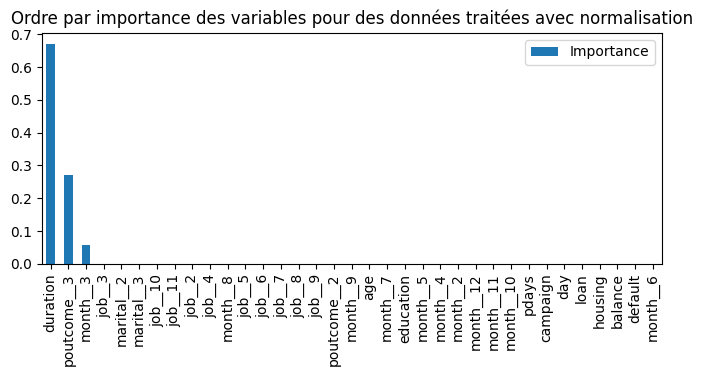

In [80]:
##### arbre de décision
## -- Normalisation


# clf modèle d'apprentissage definis plus haut par arbre de décision
feat_importances_norm = pd.DataFrame(clf_norm.feature_importances_,
                                     index=X_train.columns,
                                     columns=["Importance"])

# on trie le DF par ordre croissant
feat_importances_norm.sort_values(by='Importance',
                                  ascending=False,
                                  inplace=True)

feat_importances_norm.plot(kind='bar', figsize=(8,3))

plt.title('Ordre par importance des variables pour des données traitées avec normalisation')
plt.show()


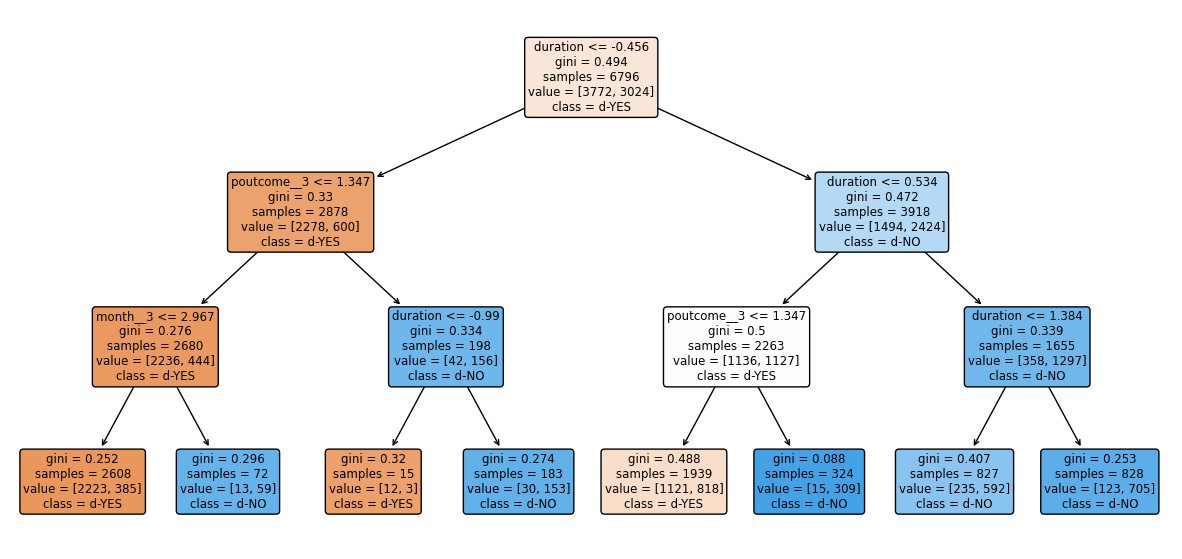

In [81]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 7))

plot_tree(clf_norm,
          feature_names = X_train.columns,
          class_names = ['d-YES', 'd-NO'],
          filled=True,
          rounded=True)

plt.show()

##### DecisionTreeClassifier - Standarscaller

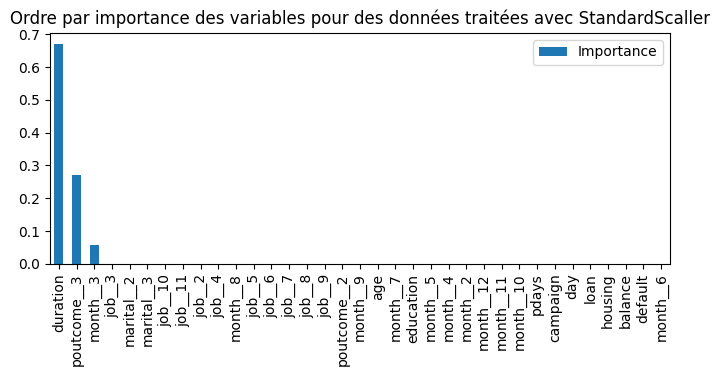

In [82]:
##### arbre de décision
## -- StandardScaller


# clf modèle d'apprentissage definis plus haut par arbre de décision
feat_importances_norm = pd.DataFrame(clf_stand.feature_importances_,
                                     index=X_train.columns,
                                     columns=["Importance"])

# on trie le DF par ordre croissant
feat_importances_norm.sort_values(by='Importance',
                                  ascending=False,
                                  inplace=True)

feat_importances_norm.plot(kind='bar', figsize=(8,3))

plt.title('Ordre par importance des variables pour des données traitées avec StandardScaller')
plt.show()


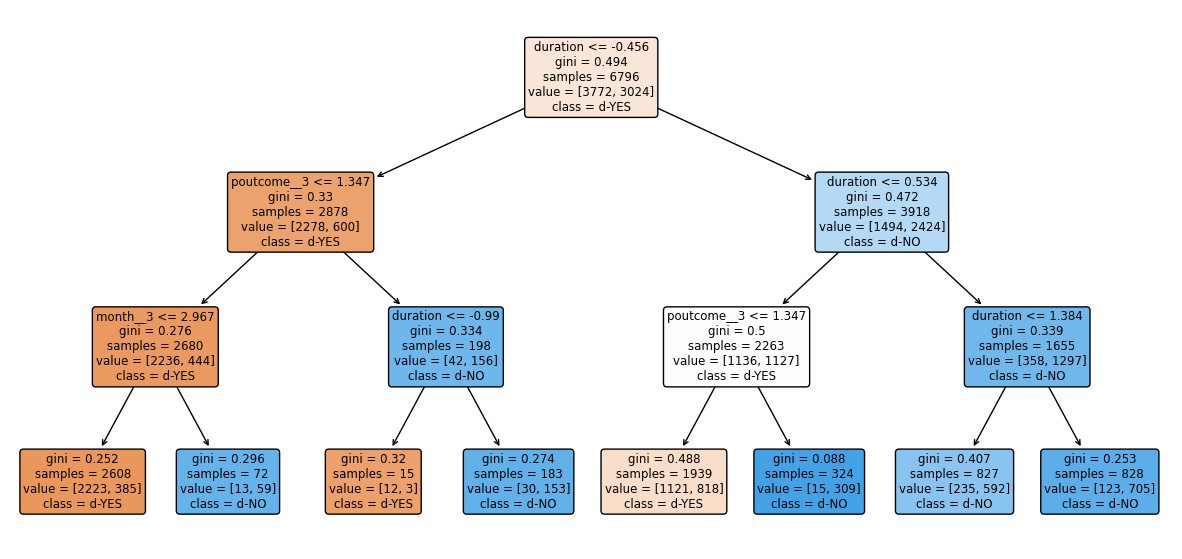

In [83]:
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(15, 7))

plot_tree(clf_stand,
          feature_names = X_train.columns,
          class_names = ['d-YES', 'd-NO'],
          filled=True,
          rounded=True)

plt.show()

#### **3.3** - **Random Forest Classifier**

In [84]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(max_depth = 3, random_state=42)
rf_norm = rf.fit(X_train_norm_scaled, y_train)
rf_stand = rf.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', rf_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', rf_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', rf_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', rf_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm = rf_norm.predict(X_test_norm_scaled)
y_pred_stand = rf_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test,y_pred_norm, rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_rf_norm = classification_report(y_test, y_pred_norm, output_dict=True)
print(cr_rf_norm)
print("\n")
print('StandardScaler :')
cr_rf_stand = classification_report(y_test, y_pred_stand, output_dict=True)
print(cr_rf_stand)

Score sur X_train_norm_scaled  : 0.6606827545615067
Score sur X_test_norm_scaled   : 0.6658823529411765
Score sur X_train_stand_scaler : 0.7608887580929958
Score sur X_test_stand_scaler  : 0.7611764705882353




'Normalisation  :'

Prédiction,0,1
Realité,,
0,432,513
1,55,700


'StandardScaler :'

Prédiction,0,1
Realité,,
0,862,83
1,323,432




Normalisation  :
{'0': {'precision': 0.8870636550308009, 'recall': 0.45714285714285713, 'f1-score': 0.6033519553072626, 'support': 945}, '1': {'precision': 0.5770816158285244, 'recall': 0.9271523178807947, 'f1-score': 0.7113821138211383, 'support': 755}, 'accuracy': 0.6658823529411765, 'macro avg': {'precision': 0.7320726354296626, 'recall': 0.6921475875118259, 'f1-score': 0.6573670345642004, 'support': 1700}, 'weighted avg': {'precision': 0.7493951611497898, 'recall': 0.6658823529411765, 'f1-score': 0.6513300551178368, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.7274261603375527, 'recall': 0.9121693121693122, 'f1-score': 0.8093896713615023, 'support': 945}, '1': {'precision': 0.8388349514563107, 'recall': 0.5721854304635762, 'f1-score': 0.6803149606299213, 'support': 755}, 'accuracy': 0.7611764705882353, 'macro avg': {'precision': 0.7831305558969317, 'recall': 0.7421773713164441, 'f1-score': 0.7448523159957118, 'support': 1700}, 'weighted avg': {'precision': 0.7769047

#### **3.4** - **SVMClassifier**

##### SVM avec noyau

In [85]:
from sklearn.svm import SVC


svm_kernel = SVC(kernel='rbf')  # 'rbf' pour un noyau gaussien
svm_kernel_norm = svm_kernel.fit(X_train_norm_scaled, y_train)
svm_kernel_stand = svm_kernel.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', svm_kernel_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', svm_kernel_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', svm_kernel_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', svm_kernel_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm = svm_kernel_norm.predict(X_test_norm_scaled)
y_pred_stand = svm_kernel_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test,y_pred_norm, rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_svm_kernel_norm = classification_report(y_test, y_pred_norm, output_dict=True)
print(cr_svm_kernel_norm)
print("\n")
print('StandardScaler :')
cr_svm_kernel_stand = classification_report(y_test, y_pred_stand, output_dict=True)
print(cr_svm_kernel_stand)

Score sur X_train_norm_scaled  : 0.7680988816951148
Score sur X_test_norm_scaled   : 0.7870588235294118
Score sur X_train_stand_scaler : 0.8691877575044143
Score sur X_test_stand_scaler  : 0.8347058823529412




'Normalisation  :'

Prédiction,0,1
Realité,,
0,877,68
1,294,461


'StandardScaler :'

Prédiction,0,1
Realité,,
0,809,136
1,145,610




Normalisation  :
{'0': {'precision': 0.748932536293766, 'recall': 0.928042328042328, 'f1-score': 0.828922495274102, 'support': 945}, '1': {'precision': 0.8714555765595463, 'recall': 0.6105960264900663, 'f1-score': 0.7180685358255452, 'support': 755}, 'accuracy': 0.7870588235294118, 'macro avg': {'precision': 0.8101940564266561, 'recall': 0.7693191772661971, 'f1-score': 0.7734955155498235, 'support': 1700}, 'weighted avg': {'precision': 0.8033471806470979, 'recall': 0.7870588235294118, 'f1-score': 0.7796902956366546, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.8480083857442348, 'recall': 0.8560846560846561, 'f1-score': 0.85202738283307, 'support': 945}, '1': {'precision': 0.8176943699731903, 'recall': 0.8079470198675497, 'f1-score': 0.8127914723517654, 'support': 755}, 'accuracy': 0.8347058823529412, 'macro avg': {'precision': 0.8328513778587125, 'recall': 0.8320158379761029, 'f1-score': 0.8324094275924177, 'support': 1700}, 'weighted avg': {'precision': 0.8345453963870

##### SVM lineaire

In [86]:
from sklearn.svm import LinearSVC

svm_linear = LinearSVC()
svm_linear_norm = svm_linear.fit(X_train_norm_scaled, y_train)
svm_linear_stand = svm_linear.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', svm_linear_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', svm_linear_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', svm_linear_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', svm_linear_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm = svm_linear_norm.predict(X_test_norm_scaled)
y_pred_stand = svm_linear_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test,y_pred_norm, rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_svm_linear_norm = classification_report(y_test, y_pred_norm,  output_dict=True)
print(cr_svm_linear_norm)
print("\n")
print('StandardScaler :')
cr_svm_linear_stand = classification_report(y_test, y_pred_stand,  output_dict=True)
print(cr_svm_linear_stand)

Score sur X_train_norm_scaled  : 0.6484696880517952
Score sur X_test_norm_scaled   : 0.6535294117647059
Score sur X_train_stand_scaler : 0.8120953502060035
Score sur X_test_stand_scaler  : 0.8182352941176471




/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


'Normalisation  :'

Prédiction,0,1
Realité,,
0,369,576
1,13,742


'StandardScaler :'

Prédiction,0,1
Realité,,
0,822,123
1,186,569




Normalisation  :
{'0': {'precision': 0.9659685863874345, 'recall': 0.3904761904761905, 'f1-score': 0.5561416729464959, 'support': 945}, '1': {'precision': 0.5629742033383915, 'recall': 0.9827814569536424, 'f1-score': 0.7158707187650749, 'support': 755}, 'accuracy': 0.6535294117647059, 'macro avg': {'precision': 0.764471394862913, 'recall': 0.6866288237149164, 'f1-score': 0.6360061958557854, 'support': 1700}, 'weighted avg': {'precision': 0.7869916692097714, 'recall': 0.6535294117647059, 'f1-score': 0.6270801609423943, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.8154761904761905, 'recall': 0.8698412698412699, 'f1-score': 0.8417818740399386, 'support': 945}, '1': {'precision': 0.8222543352601156, 'recall': 0.7536423841059603, 'f1-score': 0.7864547339322737, 'support': 755}, 'accuracy': 0.8182352941176471, 'macro avg': {'precision': 0.818865262868153, 'recall': 0.8117418269736151, 'f1-score': 0.8141183039861062, 'support': 1700}, 'weighted avg': {'precision': 0.8184864841

#### **3.5 - KNNClassifier**

In [87]:
# from interactions import show_knn  demander a manon
from sklearn import neighbors
from sklearn.neighbors import KNeighborsClassifier


knn = neighbors.KNeighborsClassifier()
knn_norm = knn.fit(X_train_norm_scaled, y_train)
knn_stand = knn.fit(X_train_stand_scaler, y_train)

print('Score sur X_train_norm_scaled  :', knn_norm.score(X_train_norm_scaled, y_train))
print('Score sur X_test_norm_scaled   :', knn_norm.score(X_test_norm_scaled, y_test))
print('Score sur X_train_stand_scaler :', knn_stand.score(X_train_stand_scaler, y_train))
print('Score sur X_test_stand_scaler  :', knn_stand.score(X_test_stand_scaler, y_test))

#### Prediction ---------------------
y_pred_norm = knn_norm.predict(X_test_norm_scaled)
y_pred_stand = knn_stand.predict(X_test_stand_scaler)
print("\n")

#### Matrice de confusion ---------------------
display('Normalisation  :', pd.crosstab(y_test,y_pred_norm, rownames=['Realité'], colnames=['Prédiction']))
print("\n")
display('StandardScaler :', pd.crosstab(y_test,y_pred_stand, rownames=['Realité'], colnames=['Prédiction']))
print("\n")

#### Rapport de classification ---------------------
print('Normalisation  :')
cr_norm = classification_report(y_test, y_pred_norm, output_dict=True)
print(cr_norm)
print("\n")
print('StandardScaler :')
cr_stand = classification_report(y_test, y_pred_stand, output_dict=True)
print(cr_stand)

Score sur X_train_norm_scaled  : 0.6286050618010595
Score sur X_test_norm_scaled   : 0.6370588235294118
Score sur X_train_stand_scaler : 0.8421130076515597
Score sur X_test_stand_scaler  : 0.7717647058823529




'Normalisation  :'

Prédiction,0,1
Realité,,
0,894,51
1,566,189


'StandardScaler :'

Prédiction,0,1
Realité,,
0,812,133
1,255,500




Normalisation  :
{'0': {'precision': 0.6123287671232877, 'recall': 0.946031746031746, 'f1-score': 0.7434511434511435, 'support': 945}, '1': {'precision': 0.7875, 'recall': 0.2503311258278146, 'f1-score': 0.37989949748743723, 'support': 755}, 'accuracy': 0.6370588235294118, 'macro avg': {'precision': 0.6999143835616438, 'recall': 0.5981814359297803, 'f1-score': 0.5616753204692904, 'support': 1700}, 'weighted avg': {'precision': 0.6901254029008864, 'recall': 0.6370588235294118, 'f1-score': 0.5819914418613799, 'support': 1700}}


StandardScaler :
{'0': {'precision': 0.761012183692596, 'recall': 0.8592592592592593, 'f1-score': 0.8071570576540755, 'support': 945}, '1': {'precision': 0.7898894154818326, 'recall': 0.6622516556291391, 'f1-score': 0.7204610951008645, 'support': 755}, 'accuracy': 0.7717647058823529, 'macro avg': {'precision': 0.7754507995872143, 'recall': 0.7607554574441993, 'f1-score': 0.7638090763774701, 'support': 1700}, 'weighted avg': {'precision': 0.773837071928404, 'rec

# Tableau recap resultat ML
###### Sans modification hyper param




In [89]:
data = [['LogisticRegression', 'normalisé', reglog_norm.score(X_train_norm_scaled, y_train), reglog_norm.score(X_test_norm_scaled, y_test), cr_reglog_norm['0']['precision'], cr_reglog_norm['1']['precision'], cr_reglog_norm['0']['recall'],cr_reglog_norm['1']['recall'], cr_reglog_norm['0']['f1-score'], cr_reglog_norm['1']['f1-score'],cr_reglog_norm['0']['support'], cr_reglog_norm['1']['support'],cr_reglog_norm['accuracy']],
        ['LogisticRegression', 'standScaller', reglog_stand.score(X_train_stand_scaler, y_train), reglog_stand.score(X_test_stand_scaler, y_test), cr_reglog_stand['0']['precision'], cr_reglog_stand['1']['precision'], cr_reglog_stand['0']['recall'],cr_reglog_stand['1']['recall'], cr_reglog_stand['0']['f1-score'], cr_reglog_stand['1']['f1-score'],cr_reglog_stand['0']['support'], cr_reglog_stand['1']['support'],cr_reglog_stand['accuracy']],
        ['DecisionTreeClassifier', 'normalisé', clf_norm.score(X_train_norm_scaled, y_train), clf_norm.score(X_test_norm_scaled, y_test), cr_clf_norm['0']['precision'], cr_clf_norm['1']['precision'], cr_clf_norm['0']['recall'],cr_clf_norm['1']['recall'], cr_clf_norm['0']['f1-score'], cr_clf_norm['1']['f1-score'],cr_clf_norm['0']['support'], cr_clf_norm['1']['support'],cr_clf_norm['accuracy']],
        ['DecisionTreeClassifier', 'standScaller', clf_stand.score(X_train_stand_scaler, y_train), clf_stand.score(X_test_stand_scaler, y_test), cr_clf_stand['0']['precision'], cr_clf_stand['1']['precision'], cr_clf_stand['0']['recall'],cr_clf_stand['1']['recall'], cr_clf_stand['0']['f1-score'], cr_clf_stand['1']['f1-score'],cr_clf_stand['0']['support'], cr_clf_stand['1']['support'],cr_clf_stand['accuracy']],
        ['RandomForestClassifier', 'normalisé', rf_norm.score(X_train_norm_scaled, y_train), rf_norm.score(X_test_norm_scaled, y_test), cr_rf_norm['0']['precision'], cr_rf_norm['1']['precision'], cr_rf_norm['0']['recall'],cr_rf_norm['1']['recall'], cr_rf_norm['0']['f1-score'], cr_rf_norm['1']['f1-score'],cr_rf_norm['0']['support'], cr_rf_norm['1']['support'],cr_rf_norm['accuracy']],
        ['RandomForestClassifier', 'standScaller', rf_stand.score(X_train_stand_scaler, y_train), rf_stand.score(X_test_stand_scaler, y_test), cr_rf_stand['0']['precision'], cr_rf_stand['1']['precision'], cr_rf_stand['0']['recall'],cr_rf_stand['1']['recall'], cr_rf_stand['0']['f1-score'], cr_rf_stand['1']['f1-score'],cr_rf_stand['0']['support'], cr_rf_stand['1']['support'],cr_rf_stand['accuracy']],
        ['SVC', 'normalisé', svm_kernel_norm.score(X_train_norm_scaled, y_train), svm_kernel_norm.score(X_test_norm_scaled, y_test), cr_svm_linear_norm['0']['precision'], cr_svm_linear_norm['1']['precision'], cr_svm_linear_norm['0']['recall'],cr_svm_linear_norm['1']['recall'], cr_svm_linear_norm['0']['f1-score'], cr_svm_linear_norm['1']['f1-score'],cr_svm_linear_norm['0']['support'], cr_svm_linear_norm['1']['support'],cr_svm_linear_norm['accuracy']],
        ['SVC', 'standScaller', svm_kernel_stand.score(X_train_stand_scaler, y_train), svm_kernel_stand.score(X_test_stand_scaler, y_test), cr_svm_kernel_stand['0']['precision'], cr_svm_kernel_stand['1']['precision'], cr_svm_kernel_stand['0']['recall'],cr_svm_kernel_stand['1']['recall'], cr_svm_kernel_stand['0']['f1-score'], cr_svm_kernel_stand['1']['f1-score'],cr_svm_kernel_stand['0']['support'], cr_svm_kernel_stand['1']['support'],cr_svm_kernel_stand['accuracy']],
        ['LinearSVC', 'normalisé', svm_linear_norm.score(X_train_norm_scaled, y_train), svm_linear_norm.score(X_test_norm_scaled, y_test), cr_svm_linear_norm['0']['precision'], cr_svm_linear_norm['1']['precision'], cr_svm_linear_norm['0']['recall'],cr_svm_linear_norm['1']['recall'], cr_svm_linear_norm['0']['f1-score'], cr_svm_linear_norm['1']['f1-score'],cr_svm_linear_norm['0']['support'], cr_svm_linear_norm['1']['support'],cr_svm_linear_norm['accuracy']],
        ['LinearSVC', 'standScaller', svm_linear_stand.score(X_train_stand_scaler, y_train), svm_linear_stand.score(X_test_stand_scaler, y_test), cr_svm_linear_stand['0']['precision'], cr_svm_linear_stand['1']['precision'], cr_svm_linear_stand['0']['recall'],cr_svm_linear_stand['1']['recall'], cr_svm_linear_stand['0']['f1-score'], cr_svm_linear_stand['1']['f1-score'],cr_svm_linear_stand['0']['support'], cr_svm_linear_stand['1']['support'],cr_svm_linear_stand['accuracy']],
        ['KNeighborsClassifier', 'normalisé', knn_norm.score(X_train_norm_scaled, y_train), knn_norm.score(X_test_norm_scaled, y_test), cr_norm['0']['precision'], cr_norm['1']['precision'], cr_norm['0']['recall'],cr_norm['1']['recall'], cr_norm['0']['f1-score'], cr_norm['1']['f1-score'],cr_norm['0']['support'], cr_norm['1']['support'],cr_norm['accuracy']],
        ['KNeighborsClassifier', 'standScaller', knn_stand.score(X_train_stand_scaler, y_train), knn_stand.score(X_test_stand_scaler, y_test),cr_stand['0']['precision'], cr_stand['1']['precision'], cr_stand['0']['recall'],cr_stand['1']['recall'], cr_stand['0']['f1-score'], cr_stand['1']['f1-score'],cr_stand['0']['support'], cr_stand['1']['support'],cr_stand['accuracy']]]

# Créer un DataFrame à partir de la liste de listes avec des noms de colonnes spécifiés
df = pd.DataFrame(data, columns=['Modéle utilise', 'methode', 'X_train_score', 'X_test_score', 'precision 0', 'precision 1', 'recall 0', 'recall 1', 'f1-score 0', 'f1-score 1', 'support 0', 'support 1', 'accuracy'])

# Afficher le DataFrame
display(df)

,Modéle utilise,methode,X_train_score,X_test_score,precision 0,precision 1,recall 0,recall 1,f1-score 0,f1-score 1,support 0,support 1,accuracy
0,LogisticRegression,normalisé,0.648028,0.652353,0.963351,0.562215,0.389418,0.981457,0.554635,0.714906,945,755,0.652353
1,LogisticRegression,standScaller,0.813861,0.821176,0.820821,0.821683,0.867725,0.762914,0.843621,0.791209,945,755,0.821176
2,DecisionTreeClassifier,normalisé,0.663626,0.665882,0.631542,0.850187,0.957672,0.300662,0.761144,0.444227,945,755,0.665882
3,DecisionTreeClassifier,standScaller,0.761330,0.772941,0.745391,0.828877,0.898413,0.615894,0.814779,0.706687,945,755,0.772941
4,RandomForestClassifier,normalisé,0.660683,0.665882,0.887064,0.577082,0.457143,0.927152,0.603352,0.711382,945,755,0.665882
5,RandomForestClassifier,standScaller,0.760889,0.761176,0.727426,0.838835,0.912169,0.572185,0.809390,0.680315,945,755,0.761176
6,SVC,normalisé,0.768099,0.787059,0.965969,0.562974,0.390476,0.982781,0.556142,0.715871,945,755,0.653529
7,SVC,standScaller,0.869188,0.834706,0.848008,0.817694,0.856085,0.807947,0.852027,0.812791,945,755,0.834706
8,LinearSVC,normalisé,0.648470,0.653529,0.965969,0.562974,0.390476,0.982781,0.556142,0.715871,945,755,0.653529
9,LinearSVC,standScaller,0.812095,0.818235,0.815476,0.822254,0.869841,0.753642,0.841782,0.786455,945,755,0.818235
